In [1]:
"""
10. 주성분 분석(PCA ; Principal Component Analysis)
    - 고차원의 데이터를 저차원의 데이터로 차원 축소하는 알고리즘
    - 시각화 및 데이터 노이즈 제거 등을 위해 사용
    
    (1) [이론] 주성분 분석
        - 데이터 정보의 유실이 가장 적은 라인을 찾아냄 ; 데이터 중첩이 가장 적다 = 데이터의 분산이 가장 크다 = 데이터 유실이 저다
        - 분산이 가장 큰 차원은 수학적으로 공분산 행렬에서 eigen value가 가장 큰 eigen vector
        - 5차원 -> 2차원 충소시 공분산 행렬에서 eigen value가 가장 큰 순서대로 eigen vector를 정렬 후 가장 큰 두개의 eigen vector를 축으로 2차원 데이터를 만듬
"""

# (2) [실습]
# 사람들의 하루 식습관 데이터를 만든 후 주성분 분석을 이용해 데이터 시각화
import pandas as pd

df = pd.DataFrame(columns = ['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0,0,2,'Skinny']
df.loc[1] = [2800,1,1,1,1,'Normal']
df.loc[2] = [3500,2,2,1,0,'Fat']
df.loc[3] = [1400,0,1,0,3,'Skinny']
df.loc[4] = [5000,2,2,2,0,'Fat']
df.loc[5] = [1300,0,0,1,2,'Skinny']
df.loc[6] = [3000,1,0,1,1,'Normal']
df.loc[7] = [4000,2,2,2,0,'Fat']
df.loc[8] = [2600,0,2,0,0,'Normal']
df.loc[9] = [3000,1,2,1,1,'Fat']

df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [2]:
#데이터 전처리
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']] #데이터 특징으로만 이루어진 데이터 프레임을 만든 후 표준화

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X) #정규화

print(x_std)


[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


In [5]:
#레이블 분리
Y = df[['body_shape']]

#공분산 행렬 구하기
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [6]:
#eigen value와 eigen vecotr 구하기
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs) #Eigenvector

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [8]:
#Eigenvalue
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [9]:
#가장 큰 고유벡터로 데이터를 사영할 경우 얼만큼의 정보가 유지되는데 확인하려면
eig_vals[0] / sum(eig_vals)

0.7318321731427545

In [10]:
#5차원 벡터를 고유벡터로 사영시키기 : 공식은 dot(A,B) / Magnitude(B) ; magnitude는 length
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [18]:
#시각화
#데이턱 사영된 고유벡터(=주성분=Principal component)를 x축으로 하고, y축을 0으로 하면
result = pd.DataFrame(projected_X, columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5, 1, 'PCA result')

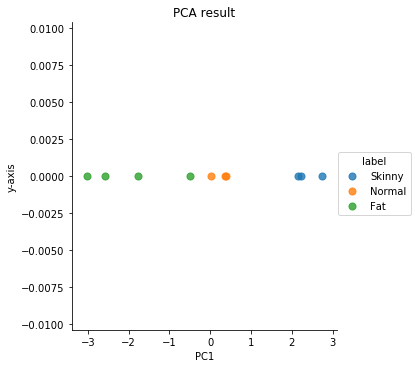

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data=result , fit_reg = False, scatter_kws={'s':50}, hue = 'label')
plt.title('PCA result')

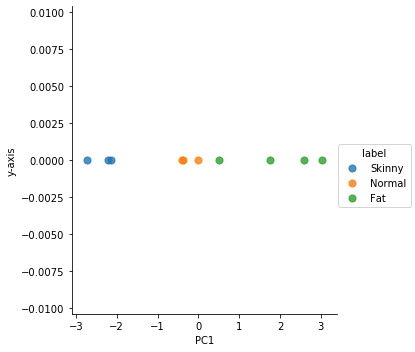

In [22]:
# 사이킷런을 활용한 주성분 분석 간단 구현
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sns.lmplot('PC1','y-axis', data=sklearn_result, fit_reg = False, scatter_kws={'s':50}, hue = 'label')